# 1. Preparation

In [1]:
!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip

--2023-11-24 08:26:52--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G  91.0MB/s    in 16s     

2023-11-24 08:27:08 (97.6 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]



In [2]:
!unzip FullIJCNN2013.zip

Archive:  FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  inflating: FullIJCNN2013/00010.ppm  
  inflating: FullIJCNN2013/00011.ppm  
  inflating: FullIJCNN2013/00012.ppm  
  inflating: FullIJCNN2013/00013.ppm  
  inflating: FullIJCNN2013/00014.ppm  
  inflating: FullIJCNN2013/00015.ppm  
  inflating: FullIJCNN2013/00016.ppm  
  inflating: FullIJCNN2013/00017.ppm  
  inflating: FullIJCNN2013/00018.ppm  
  inflating: FullIJCNN2013/00019.ppm  
  inflating: FullIJCNN2013/00020.ppm  
  inflating: FullIJCNN2013/00021.ppm  
  inflating: FullIJCNN2013/00022.ppm  
  inflating: Ful

In [3]:
!ls -al ./FullIJCNN2013/gt.txt

-rw-r--r-- 1 root root 35282 Jul  9  2013 ./FullIJCNN2013/gt.txt


In [4]:
import pandas as pd
import os
import cv2

In [5]:
test_percentage = 0.2
file_name = '/content/FullIJCNN2013/gt.txt'

In [6]:
annotation = pd.read_csv(file_name, names = ['ImageId', 'Roi.X1', 'Roi.Y1','Roi.X2','Roi.Y2','ClassId'] ,sep = ';')

In [7]:
Prohibitory = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 16]
Danger = [11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Mandatory = [33, 34, 35, 36, 37, 38, 39, 40]
Other = [6, 12, 13, 14, 17, 32, 41, 42]

categories = ['Prohibitory' ,'Danger', 'Mandatory','Other']

In [8]:
annotation['CategoryId'] = 0

In [9]:
annotation.head()

ImageId  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  CategoryId
0  00000.ppm     774     411     815     446       11           0
1  00001.ppm     983     388    1024     432       40           0
2  00001.ppm     386     494     442     552       38           0
3  00001.ppm     973     335    1031     390       13           0
4  00002.ppm     892     476    1006     592       39           0

In [10]:
annotation.loc[annotation['ClassId'].isin(Prohibitory), 'CategoryId'] = 0
annotation.loc[annotation['ClassId'].isin(Danger), 'CategoryId'] = 1
annotation.loc[annotation['ClassId'].isin(Mandatory), 'CategoryId'] = 2
annotation.loc[annotation['ClassId'].isin(Other), 'CategoryId'] = 3

In [11]:
annotation.head()

ImageId  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  CategoryId
0  00000.ppm     774     411     815     446       11           1
1  00001.ppm     983     388    1024     432       40           2
2  00001.ppm     386     494     442     552       38           2
3  00001.ppm     973     335    1031     390       13           3
4  00002.ppm     892     476    1006     592       39           2

In [12]:
annotation['centerX'] = (annotation['Roi.X2'] + annotation['Roi.X1']) / 2
annotation['centerY'] = (annotation['Roi.Y2'] + annotation['Roi.Y1']) / 2
annotation['width'] = (annotation['Roi.X2'] - annotation['Roi.X1'])
annotation['height'] = (annotation['Roi.Y2'] - annotation['Roi.Y1'])

In [13]:
annotation.head()

ImageId  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  CategoryId  centerX  \
0  00000.ppm     774     411     815     446       11           1    794.5   
1  00001.ppm     983     388    1024     432       40           2   1003.5   
2  00001.ppm     386     494     442     552       38           2    414.0   
3  00001.ppm     973     335    1031     390       13           3   1002.0   
4  00002.ppm     892     476    1006     592       39           2    949.0   

   centerY  width  height  
0    428.5     41      35  
1    410.0     41      44  
2    523.0     56      58  
3    362.5     58      55  
4    534.0    114     116

In [14]:
image_path = '/content/FullIJCNN2013'

In [15]:
os.chdir(image_path)

In [16]:
!ls -al

total 2869452
drwxr-xr-x 45 root root   36864 Jul  9  2013 .
drwxr-xr-x  1 root root    4096 Nov 24 08:27 ..
drwxr-xr-x  2 root root    4096 Jul  9  2013 00
-rw-r--r--  1 root root 3264016 Nov 26  2012 00000.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00001.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00002.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00003.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00004.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00005.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00006.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00007.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00008.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00009.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00010.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00011.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00012.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00013.ppm
-rw-r--r--  1 root root 3264016 Nov 26  2012 00014.ppm
-rw-r--r--  1 root

In [17]:
paths = []
for current_dir, dirs, files in os.walk('.'):
  for file in files:
    if file.endswith('.ppm'):
      image_ppm = cv2.imread(file)
      h, w = image_ppm.shape[:2]
      image_name = file.split('.')[0]
      txt_file = image_name + '.txt'
      image_jpg = image_name + '.jpg'
      cv2.imwrite(image_jpg, image_ppm)
      txt = open(txt_file, 'w')
      objects = annotation.loc[annotation['ImageId'] == file].copy()
      for index, data in objects.iterrows():
        line = str(data['CategoryId']) + ' ' + str(data['centerX']/w) + ' ' + str(data['centerY']/h) + ' ' + str(data['width']/w) + ' ' + str(data['height']/h) + '\n'
        txt.write(line)
      image_path = image_jpg + '\n'
      paths.append(image_path)
      print(image_jpg, ' is created')

00772.jpg  is created
00721.jpg  is created
00860.jpg  is created
00041.jpg  is created
00654.jpg  is created
00567.jpg  is created
00331.jpg  is created
00685.jpg  is created
00820.jpg  is created
00429.jpg  is created
00228.jpg  is created
00472.jpg  is created
00357.jpg  is created
00388.jpg  is created
00827.jpg  is created
00275.jpg  is created
00638.jpg  is created
00669.jpg  is created
00579.jpg  is created
00893.jpg  is created
00064.jpg  is created
00465.jpg  is created
00277.jpg  is created
00591.jpg  is created
00320.jpg  is created
00814.jpg  is created
00749.jpg  is created
00231.jpg  is created
00297.jpg  is created
00192.jpg  is created
00241.jpg  is created
00210.jpg  is created
00899.jpg  is created
00197.jpg  is created
00016.jpg  is created
00530.jpg  is created
00659.jpg  is created
00208.jpg  is created
00892.jpg  is created
00191.jpg  is created
00831.jpg  is created
00376.jpg  is created
00140.jpg  is created
00562.jpg  is created
00234.jpg  is created
00056.jpg 

In [18]:
num_test = int(len(paths) * test_percentage)
print(len(paths))
print(num_test)

2113
422


In [19]:
paths_test = paths[:num_test]
paths_train = paths[num_test:]

In [20]:
%cd /content/drive/MyDrive/darknet

/content/drive/MyDrive/darknet


In [22]:
with open('train.txt', 'w') as train_txt:
    for path in paths_train:
      paths = '/content/FullIJCNN2013/' + path
      train_txt.write(paths)
    print('[train.txt] is created')

[train.txt] is created


In [23]:
with open('test.txt', 'w') as test_txt:
    for path in paths_test:
      paths = '/content/FullIJCNN2013/' + path
      test_txt.write(paths)
    print('[test.txt] is created')

[test.txt] is created


In [24]:
with open('classes.names', 'w') as names:
  for category in categories:
    line = category + '\n'
    names.write(line)
  print('[classes.names] is created')

[classes.names] is created


In [25]:
with open('traffic.data', 'w') as data:
    data.write('classes = ' + '/content/drive/MyDrive/darknet/' + str(len(categories)) + '\n')
    data.write('train = ' + '/content/drive/MyDrive/darknet/' + 'train.txt' + '\n')
    data.write('valid = ' + '/content/drive/MyDrive/darknet/' + 'test.txt' + '\n')
    data.write('names = ' + '/content/drive/MyDrive/darknet/' + 'classes.names' + '\n')
    data.write('backup = /content/drive/MyDrive/darknet/backup')
    print('[traffic.data] is created')

[traffic.data] is created


In [21]:
!chmod +x ./darknet

In [ ]:
# 학습
!./darknet detector train /content/FullIJCNN2013/traffic.data /content/drive/MyDrive/darknet/trafficsign/traffic-sign-yolo.cfg /content/drive/MyDrive/darknet/darknet53.conv.74 -dont_show

In [ ]:
# 이어서 학습
!./darknet detector train /content/drive/MyDrive/darknet/traffic.data /content/drive/MyDrive/darknet/trafficsign/traffic-sign-yolo.cfg /content/drive/MyDrive/darknet/backup/traffic-sign-yolo_6000.weights -dont_show

# 2. Test

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython
import time

In [2]:
weight_file = '/content/drive/MyDrive/darknet/backup/traffic-sign-yolo_final.weights'
cfg_file = '/content/drive/MyDrive/darknet/trafficsign/traffic-sign-yolo.cfg'
name_file = '/content/drive/MyDrive/darknet/trafficsign/classes.names'
min_confidence = 0.5

In [3]:
frame_count = 0
writer = None
input_name = '/content/drive/MyDrive/darknet/trafficsign/traffic-sign-video.mp4'
output_name = '/content/drive/MyDrive/darknet/trafficsign/traffic-sign-video.avi'
file_name = '/content/FullIJCNN2013/00000.ppm'

In [4]:
# Yolo 모델 로드
net = cv2.dnn.readNet(weight_file, cfg_file)

# 출력 레이어 이름 얻기
layer_names = net.getLayerNames()
output_layers_indices = net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices]

In [5]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['Prohibitory', 'Danger', 'Mandatory', 'Other']


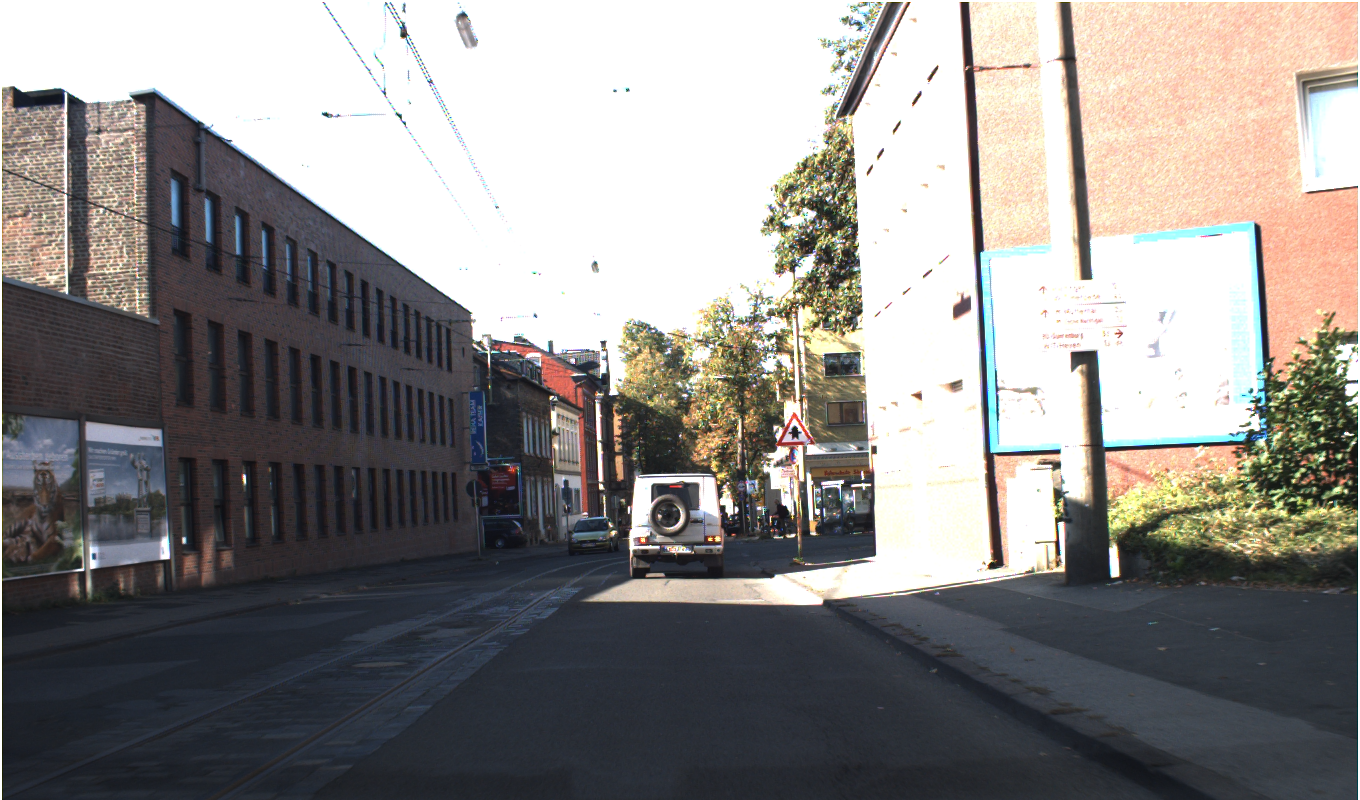

800 1360


In [6]:
img = cv2.imread(file_name)
height, width, channels = img.shape
cv2_imshow(img)
print(height, width)

1 Danger


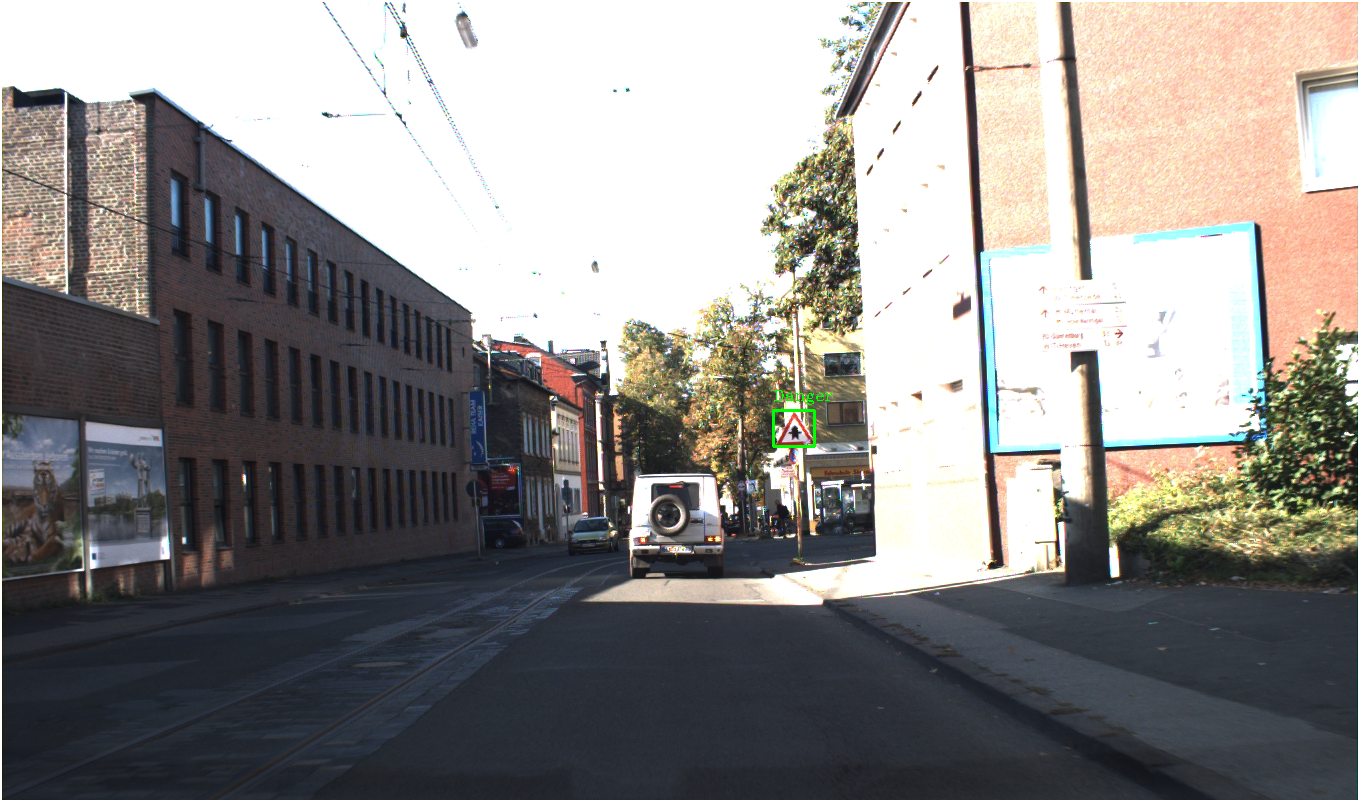

In [7]:
# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)

cv2_imshow(img)

# Video Detection

In [8]:
def writeFrame(img):
    # use global variable, writer
    global writer
    height, width = img.shape[:2]
    if writer is None and output_name is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
    if writer is not None:
        writer.write(img)

def detectAndDisplay(frame):
    # use global variable, writer
    global frame_count
    frame_count += 1
    start_time = time.time()
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > min_confidence:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(class_ids[i], label)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)

    frame_time = time.time() - start_time
    print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)
    writeFrame(frame)

Frame 1203 time 1.0473203659057617


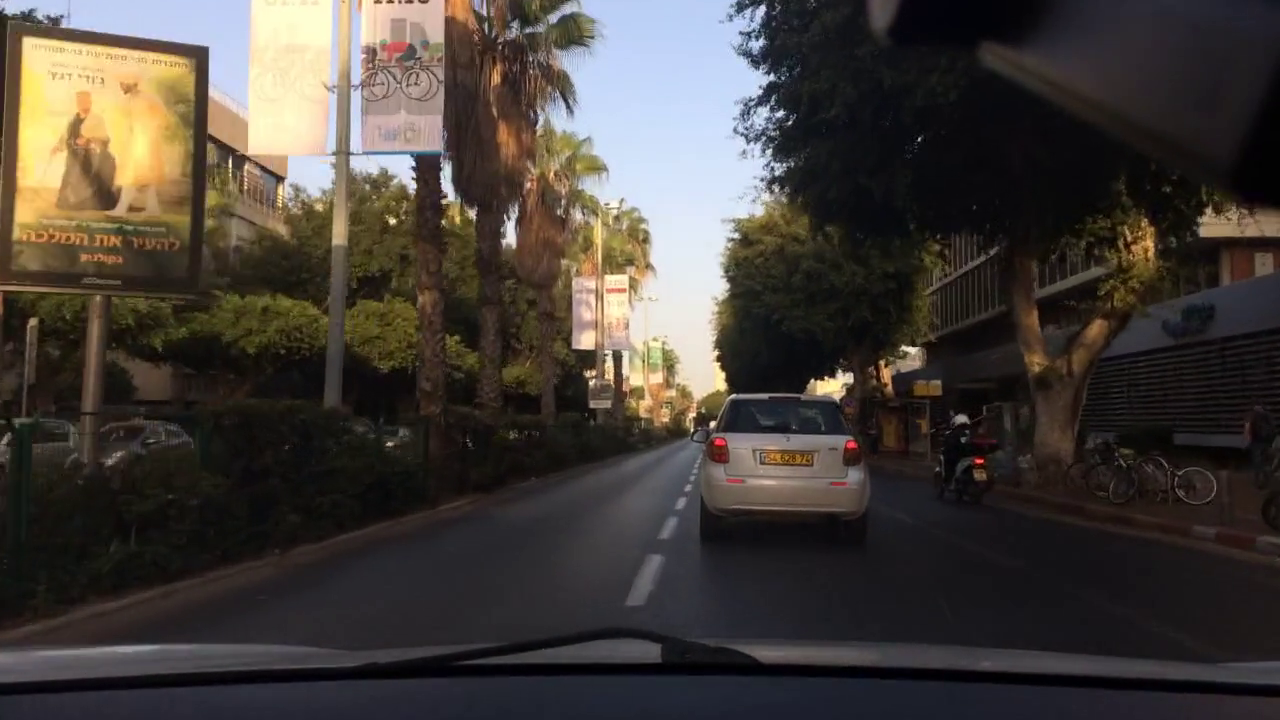

--(!) No captured frame -- Break!


In [9]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(input_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)

In [11]:
from google.colab import files
files.download(output_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -U kora

In [27]:
# 영상 출력
from kora.drive import upload_public
url = upload_public('/content/drive/MyDrive/darknet/trafficsign/traffic-sign-video.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")